# Group 6 Mini Project 2


# 1. Data Preprocessing [4 points]

 Read the text data from the respective folders into a single variable 
 
 The Variable will  have list of sentences from the text in each .txt file in all the folders 
 
 Convert the variable into corresponding feature vectors as below. Perform pre-processing step of stopword removal from text.  [1 pt]
 
 For each title text, convert it into corresponding TF-IDF vector. [1 pt]
 
 TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA. [2 pt] 

In [38]:
#Imports
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from matplotlib import style
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from tkinter import *
from tkinter.font import Font
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from pyclustertend import hopkins
from sklearn.decomposition import PCA
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
from sklearn.cluster import KMeans
import os
##print(os.listdir("../input"))
sns.set()
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN,AgglomerativeClustering, KMeans
######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re  #regular expression
from bs4 import BeautifulSoup
sw = stopwords.words('english')
stemmer = SnowballStemmer("english")
url_re = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'


In [39]:
#Extract and read text files

path = 'problem_statement_2-Copy\\problem_statement_2\\'
sentence = pd.DataFrame()
for directory in os.listdir(path):
        print('extracting data for directory '+directory)
        for filename in tqdm(os.listdir(path+'\\'+directory),position=0, leave=True):
            with open(os.path.join(path+'\\'+directory, filename)) as f:
                observation = f.read()
                current_df = pd.DataFrame({'sentences': [observation]})
                sentence = sentence.append(current_df, ignore_index=True)
               
print(sentence)

extracting data for directory business


100%|████████████████████████████████████████████████████████████████████████████████| 510/510 [00:06<00:00, 82.15it/s]


extracting data for directory entertainment


100%|████████████████████████████████████████████████████████████████████████████████| 386/386 [00:04<00:00, 88.11it/s]


extracting data for directory politics


100%|████████████████████████████████████████████████████████████████████████████████| 417/417 [00:04<00:00, 85.16it/s]


extracting data for directory sport


100%|████████████████████████████████████████████████████████████████████████████████| 511/511 [00:05<00:00, 87.92it/s]


extracting data for directory tech


100%|████████████████████████████████████████████████████████████████████████████████| 401/401 [00:04<00:00, 89.65it/s]


                                              sentences
0     Ad sales boost Time Warner profit\n\nQuarterly...
1     Dollar gains on Greenspan speech\n\nThe dollar...
2     Yukos unit buyer faces loan claim\n\nThe owner...
3     High fuel prices hit BA's profits\n\nBritish A...
4     Pernod takeover talk lifts Domecq\n\nShares in...
...                                                 ...
2220  BT program to beat dialler scams\n\nBT is intr...
2221  Spam e-mails tempt net shoppers\n\nComputer us...
2222  Be careful how you code\n\nA new European dire...
2223  US cyber security chief resigns\n\nThe man mak...
2224  Losing yourself in online gaming\n\nOnline rol...

[2225 rows x 1 columns]


In [40]:
#Sentence curation functions
def stopwords(text):
    '''a function for removing the stopword'''
    
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def stemming(text):    
    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)     

def remove_html(text):
    '''
    remove the HTML tags and URLS from the tweets
    '''
    if text:
        # BeautifulSoup on content
        soup = BeautifulSoup(text, "html.parser")
        # Stripping all <code> tags with their content if any
        if soup.code:
            soup.code.decompose()
        # Get all the text out of the html
        text =  soup.get_text()
        # Returning text stripping out all uris
        return re.sub(url_re, "", text)
    else:
        return ""
    
def remove_emojis(text):
    
    emoji_pattern = re.compile("["
        r"\U0001F600-\U0001F64F"  # emoticons
        r"\U0001F300-\U0001F5FF"  # symbols & pictographs
        r"\U0001F680-\U0001F6FF"  # transport & map symbols
        r"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)# no emoji 
  
    return text

In [41]:
## Remove unwanted words ##

sentence['sentences'] = sentence['sentences'].apply(remove_html)
sentence['sentences'] = sentence['sentences'].apply(remove_emojis)
sentence['sentences'] = sentence['sentences'].apply(remove_punctuation)
sentence['sentences'] = sentence['sentences'].apply(stopwords)
sentence['sentences'] = sentence['sentences'].apply(stemming)

print(sentence)

                                              sentences
0     ad sale boost time warner profit quarter profi...
1     dollar gain greenspan speech dollar hit highes...
2     yuko unit buyer face loan claim owner embattl ...
3     high fuel price hit bas profit british airway ...
4     pernod takeov talk lift domecq share uk drink ...
...                                                 ...
2220  bt program beat dialler scam bt introduc two i...
2221  spam email tempt net shopper comput user acros...
2222  care code new european direct could put softwa...
2223  us cyber secur chief resign man make sure us c...
2224  lose onlin game onlin role play game timeconsu...

[2225 rows x 1 columns]


In [42]:
## Extract TF-IDF Vector ##

# instantiate the vectorizer object
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th sentences into a matrix
tfidf_wm = tfidfvectorizer.fit_transform([" ".join(review) for review in sentence['sentences'].values])# becauase TFIDF vectorizer takes texts and not lists
#retrieve the terms found in the corpora


tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)#index = ['Doc1','Doc2'])

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

ValueError: empty vocabulary; perhaps the documents only contain stop words

# CLUSTERING IMPLEMENTATION

In [25]:
df_final_data_1.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302192,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097690,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093094,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.233671,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257060,-0.525551,0.36068
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740504,-0.115060,0.669931,-0.525551,0.36068
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475157,1.596313,-0.277090,2.893453,0.36068
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603083,-0.364116,-0.133926,-0.525551,0.36068
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688678,-0.360933,-0.228265,-0.525551,0.36068
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788050,-0.196336,-0.318999,-0.525551,0.36068


In [26]:
df_final_data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,4.195651e-16,1.000056,-0.751640,-0.690008,-0.332029,0.235256,8.397489
BALANCE_FREQUENCY,8950.0,1.209548e-14,1.000056,-3.703271,0.049045,0.518084,0.518084,0.518084
PURCHASES,8950.0,-9.278518e-16,1.000056,-0.469552,-0.451001,-0.300454,0.050047,22.483510
ONEOFF_PURCHASES,8950.0,3.916048e-15,1.000056,-0.356934,-0.356934,-0.334040,-0.009057,24.201066
INSTALLMENTS_PURCHASES,8950.0,2.275424e-15,1.000056,-0.454576,-0.454576,-0.356156,0.063663,24.426889
CASH_ADVANCE,8950.0,5.697020e-15,1.000056,-0.466786,-0.466786,-0.466786,0.064352,22.011117
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,5.856519e-16,1.000056,-0.675349,-0.675349,-0.675349,0.435149,6.820521


In [27]:
df_final_data_1.isna().sum()



BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [28]:
mean_value=df_final_data_1['CREDIT_LIMIT'].mean()
df_final_data_1['CREDIT_LIMIT']=df_final_data_1['CREDIT_LIMIT'].fillna(mean_value)

In [29]:
mean_value=df_final_data_1['MINIMUM_PAYMENTS'].mean()
df_final_data_1['MINIMUM_PAYMENTS']=df_final_data_1['MINIMUM_PAYMENTS'].fillna(mean_value)

In [30]:
df_final_data_1.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397997,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131576,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095840,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050294,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134071,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140780,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006228,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027248,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032113,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100678,-0.249773,-0.133372


In [31]:
df_final_data_1.cov()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000112,0.322448,0.181281,0.164368,0.126483,0.496747,-0.077952,0.073174,-0.063193,0.449268,0.385195,0.154356,0.531356,0.322838,0.398041,-0.318995,0.072700
BALANCE_FREQUENCY,0.322448,1.000112,0.133689,0.104335,0.124306,0.099399,0.229741,0.202438,0.176099,0.191894,0.141571,0.189647,0.095942,0.065015,0.131591,-0.095093,0.119789
PURCHASES,0.181281,0.133689,1.000112,0.916947,0.679972,-0.051480,0.393061,0.498485,0.315602,-0.120157,-0.067183,0.689638,0.357017,0.603331,0.095851,0.180399,0.086298
ONEOFF_PURCHASES,0.164368,0.104335,0.916947,1.000112,0.330658,-0.031329,0.264967,0.524950,0.127743,-0.082637,-0.046217,0.545584,0.319771,0.567355,0.050300,0.132778,0.064157
INSTALLMENTS_PURCHASES,0.126483,0.124306,0.679972,0.330658,1.000112,-0.064251,0.442467,0.214066,0.511408,-0.132333,-0.074007,0.628178,0.256543,0.384127,0.134085,0.182590,0.086153
CASH_ADVANCE,0.496747,0.099399,-0.051480,-0.031329,-0.064251,1.000112,-0.215531,-0.086764,-0.177090,0.628592,0.656571,-0.075859,0.304031,0.453289,0.140796,-0.152952,-0.068320
PURCHASES_FREQUENCY,-0.077952,0.229741,0.393061,0.264967,0.442467,-0.215531,1.000112,0.501399,0.863030,-0.308513,-0.203501,0.568493,0.119846,0.103476,0.006229,0.305837,0.061513
ONEOFF_PURCHASES_FREQUENCY,0.073174,0.202438,0.498485,0.524950,0.214066,-0.086764,0.501399,1.000112,0.142345,-0.111728,-0.069096,0.544930,0.295092,0.243564,-0.027251,0.157548,0.082475
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063193,0.176099,0.315602,0.127743,0.511408,-0.177090,0.863030,0.142345,1.000112,-0.262988,-0.169226,0.530034,0.060801,0.085561,0.032116,0.250115,0.073284
CASH_ADVANCE_FREQUENCY,0.449268,0.191894,-0.120157,-0.082637,-0.132333,0.628592,-0.308513,-0.111728,-0.262988,1.000112,0.799650,-0.131183,0.132622,0.183212,0.100689,-0.249801,-0.133387


In [32]:
a = df_final_data_1.corr()

<AxesSubplot:>

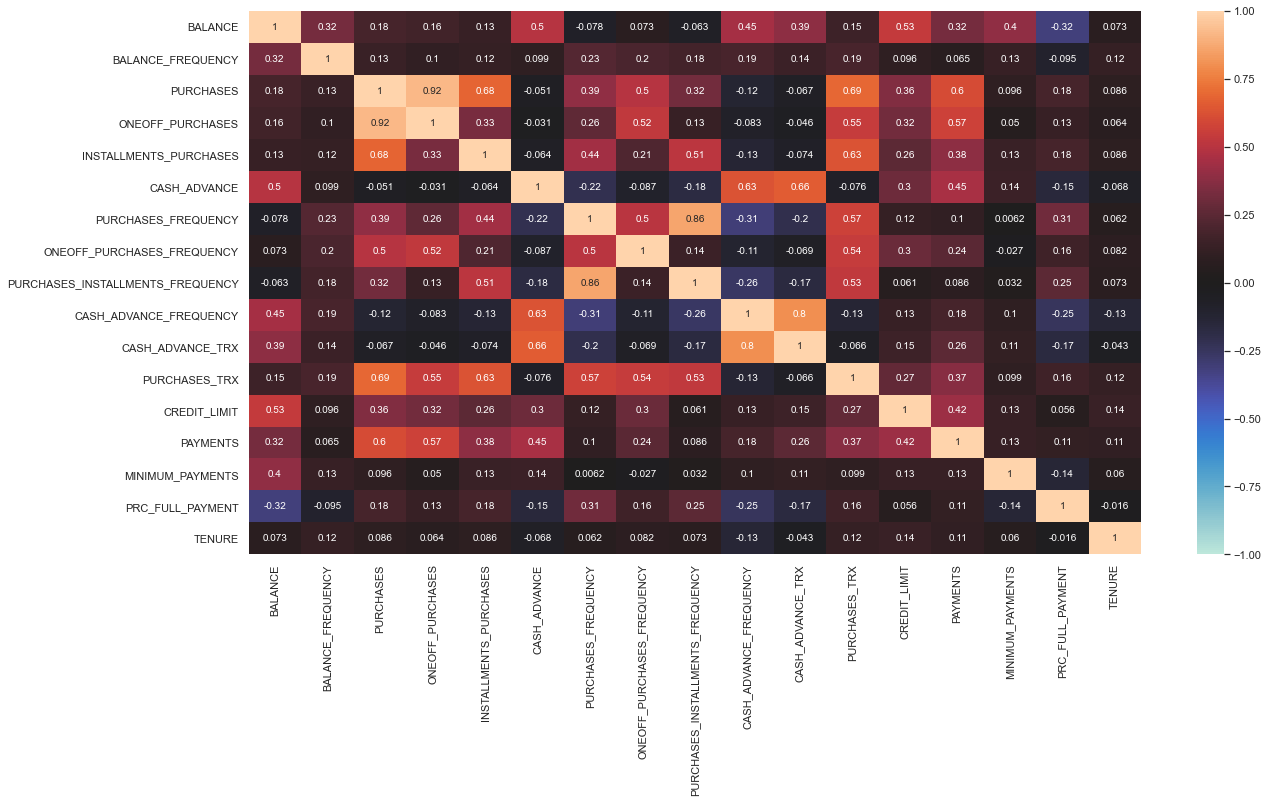

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(a,vmin=-1,vmax=1,center=0,annot=True)

In [34]:
from sklearn.preprocessing import StandardScaler
X = df_final_data_1.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.24943448, -0.42489974, -0.35693402, ..., -0.30219162,
        -0.52555097,  0.36067954],
       [ 0.13432467, -0.46955188, -0.35693402, ...,  0.09768992,
         0.2342269 ,  0.36067954],
       [ 0.51808382, -0.10766823,  0.10888851, ..., -0.09309443,
        -0.52555097,  0.36067954],
       ...,
       [-0.18547673, -0.40196519, -0.35693402, ..., -0.32666531,
         0.32919999, -4.12276757],
       [-0.18547673, -0.46955188, -0.35693402, ..., -0.33809497,
         0.32919999, -4.12276757],
       [-0.88903307,  0.04214581,  0.30173158, ..., -0.32414873,
        -0.52555097, -4.12276757]])

# Build K-means

In [35]:

kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df_final_data_1)

KMeans(n_clusters=6, random_state=0)

In [36]:
kmeans.labels_

array([1, 2, 5, ..., 0, 1, 1])

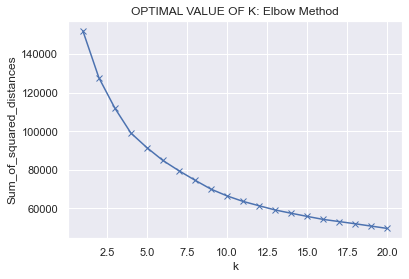

In [37]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final_data_1)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('OPTIMAL VALUE OF K: Elbow Method')
plt.show()

In [38]:
km_sample = KMeans(n_clusters=8)
km_sample.fit(df_final_data_1)



KMeans()

In [39]:
##Silhouette
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df_final_data_1)
    centers = km.cluster_centers_

    score = silhouette_score(df_final_data_1, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.21031603698953827
For n_clusters = 3, silhouette score is 0.25037835833826566
For n_clusters = 4, silhouette score is 0.19730217717806856
For n_clusters = 5, silhouette score is 0.1928743701217848
For n_clusters = 6, silhouette score is 0.20254669025600916
For n_clusters = 7, silhouette score is 0.21466366154296027
For n_clusters = 8, silhouette score is 0.22177570421283696
For n_clusters = 9, silhouette score is 0.22687769464677118
For n_clusters = 10, silhouette score is 0.22407037126985999
For n_clusters = 11, silhouette score is 0.21870950693478236
For n_clusters = 12, silhouette score is 0.2143414575614002
For n_clusters = 13, silhouette score is 0.22107513950507332
For n_clusters = 14, silhouette score is 0.19533821548929844
For n_clusters = 15, silhouette score is 0.1994038475412873
For n_clusters = 16, silhouette score is 0.20466266921898435
For n_clusters = 17, silhouette score is 0.20495137276239297
For n_clusters = 18, silhouette sco

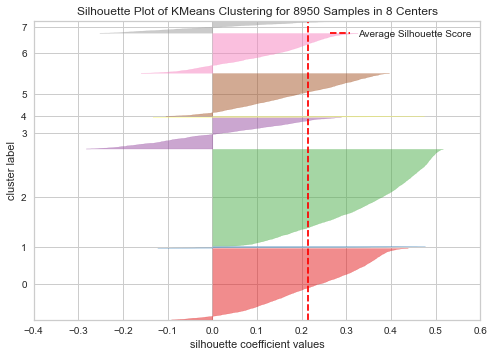

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
## Visualization using Yellowbrick library
##Silhouette Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Initiate clustering model and visualizer
km = KMeans (n_clusters=8)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(df_final_data_1) # Fit training data into the visualizer
visualizer.poof() # Draw

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

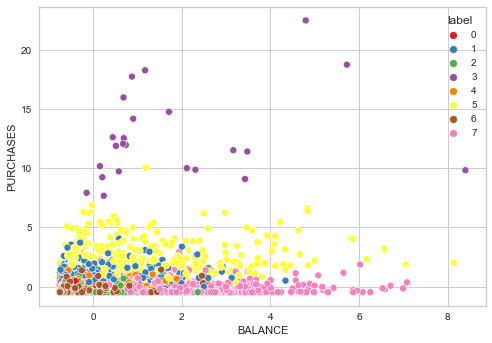

In [41]:
labels_sample = km_sample.labels_
df_final_data_1['label'] = labels_sample
sns.set_palette('Set2')
sns.scatterplot(df_final_data_1['BALANCE'],df_final_data_1['PURCHASES'],hue=df_final_data_1['label'],palette='Set1')


In [42]:
km_sample = KMeans(n_clusters=9)
km_sample.fit(df_final_data_1)

KMeans(n_clusters=9)

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

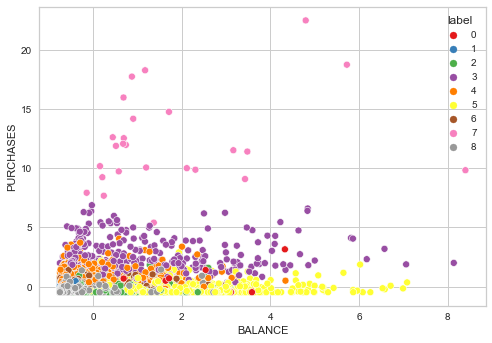

In [43]:
labels_sample = km_sample.labels_
df_final_data_1['label'] = labels_sample
sns.set_palette('Set2')
sns.scatterplot(df_final_data_1['BALANCE'],df_final_data_1['PURCHASES'],hue=df_final_data_1['label'],palette='Set1')

## Gaussian Mixture Model

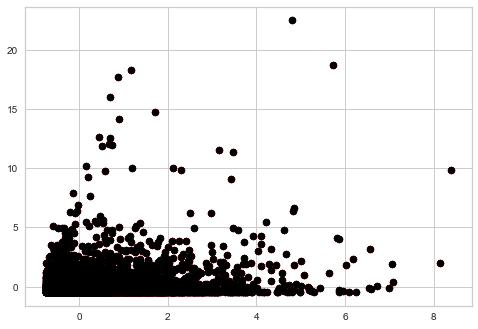

In [44]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(df_final_data_1)

#predictions from gmm
labels = gmm.predict(df_final_data_1)
frame = pd.DataFrame(df_final_data_1)
frame['cluster'] = labels
frame.columns =df_final_data_1.columns 

color=['blue','green','red', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(df_final_data_1["BALANCE"],df_final_data_1["PURCHASES"],c=color[k])
plt.show()


In [45]:
for n_clusters in range(2,21):

    score = silhouette_score(df_final_data_1, labels)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.13040046465201002
For n_clusters = 3, silhouette score is 0.13040046465201002
For n_clusters = 4, silhouette score is 0.13040046465201002
For n_clusters = 5, silhouette score is 0.13040046465201002
For n_clusters = 6, silhouette score is 0.13040046465201002
For n_clusters = 7, silhouette score is 0.13040046465201002
For n_clusters = 8, silhouette score is 0.13040046465201002
For n_clusters = 9, silhouette score is 0.13040046465201002
For n_clusters = 10, silhouette score is 0.13040046465201002
For n_clusters = 11, silhouette score is 0.13040046465201002
For n_clusters = 12, silhouette score is 0.13040046465201002
For n_clusters = 13, silhouette score is 0.13040046465201002
For n_clusters = 14, silhouette score is 0.13040046465201002
For n_clusters = 15, silhouette score is 0.13040046465201002
For n_clusters = 16, silhouette score is 0.13040046465201002
For n_clusters = 17, silhouette score is 0.13040046465201002
For n_clusters = 18, silhouette 

In [46]:
datacredit = pd.read_csv('CC GENERAL.csv')
datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
## let's see the columns with nas
datacredit.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [48]:
## We fill the na's on the dataset with the mean of each columns 
mp_mean = datacredit['MINIMUM_PAYMENTS'].mean()
datacredit['MINIMUM_PAYMENTS'].fillna(value = mp_mean, inplace = True)
datacredit['CREDIT_LIMIT'].fillna(value = mp_mean, inplace = True)

In [49]:
# after the imputation 
datacredit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [50]:
datacredit.drop("CUST_ID", axis = 1, inplace = True)
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [51]:
datacredit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.043837,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.814746,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [52]:
## standrised data
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

copiadata = escala.fit_transform(df_final_data_1)
datacopia = pd.DataFrame(copiadata, columns= df_final_data_1.columns)
datacopia.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302192,-0.525551,0.36068,-0.824520,0.351436
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097690,0.234227,0.36068,0.574164,-0.544676
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093094,-0.525551,0.36068,0.107936,-0.544676
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.233671,-0.525551,0.36068,-0.824520,-0.544676
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257060,-0.525551,0.36068,-0.824520,0.351436


#   linkages (Ward, Complete, Average) 

In [53]:
enlaces = linkage(datacopia, method = "ward") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36039062e-03, 2.00000000e+00],
       ...,
       [1.78890000e+04, 1.78930000e+04, 1.75360612e+02, 4.80300000e+03],
       [1.78940000e+04, 1.78950000e+04, 1.77183131e+02, 4.14700000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.15884141e+02, 8.95000000e+03]])

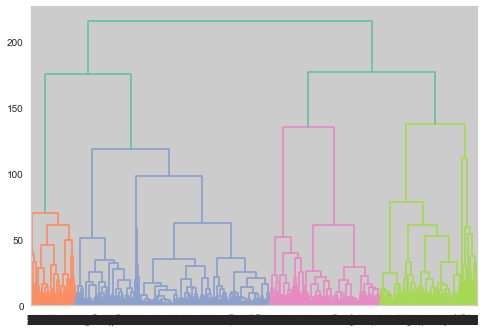

In [54]:
dendrogram(enlaces);

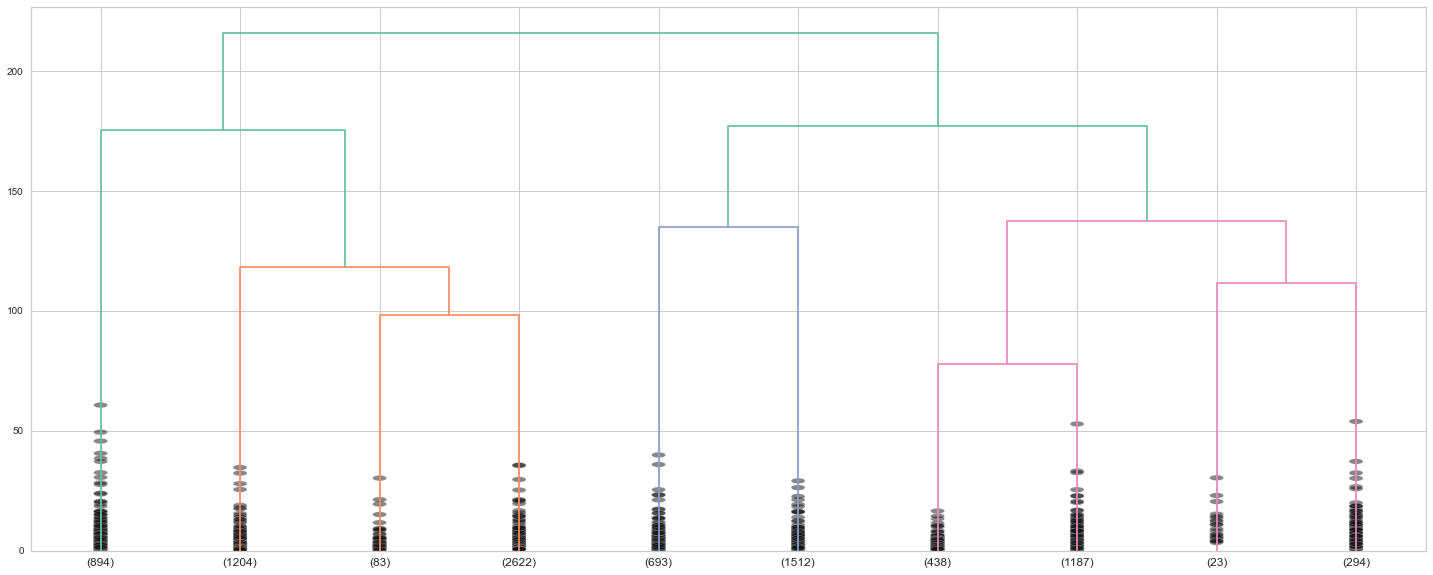

In [55]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [56]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [57]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[26.3829138 , 16.04214973, 27.        ,  2.70031169],
       [19.32692974, 17.13618623, 31.        ,  3.42983297],
       [22.86484823, 20.64414863, 28.        ,  3.64928095],
       [26.42608958, 21.63393516, 26.        ,  3.93235957],
       [29.18343061, 26.2175295 , 30.        ,  3.4036461 ],
       [23.85588403, 24.33667406, 31.        ,  4.57522623],
       [34.21534591, 29.91671871, 31.        ,  3.45935757],
       [44.17673236, 34.8051378 , 30.        ,  3.76909525],
       [47.22410206, 41.06179399, 31.        ,  3.16496227],
       [71.51412658, 50.82234199, 31.        ,  2.84068007]])

[215.88414063 177.18313063 175.36061199 137.70797331 135.20167367
 118.41862276 111.49850156  98.2011466   78.10118631  69.70171824]
[ 36.87849136 -35.83012005  35.14633905 -14.27675127   9.86292971
  -6.37723376  -6.80260533  11.70049222]


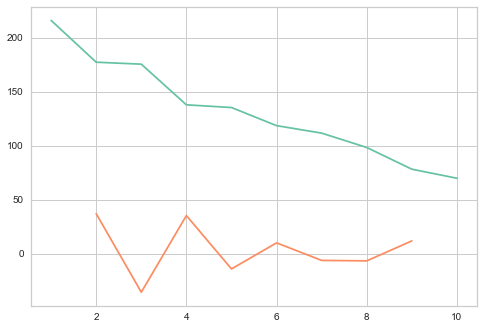

In [58]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [59]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [60]:
for n_clusters in range(2,21):
    #km = KMeans (n_clusters=n_clusters)
    #preds = km.fit_predict(df)
    

    score = silhouette_score(df_final_data_1, clusteres)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.3230817338304043
For n_clusters = 3, silhouette score is 0.3230817338304043
For n_clusters = 4, silhouette score is 0.3230817338304043
For n_clusters = 5, silhouette score is 0.3230817338304043
For n_clusters = 6, silhouette score is 0.3230817338304043
For n_clusters = 7, silhouette score is 0.3230817338304043
For n_clusters = 8, silhouette score is 0.3230817338304043
For n_clusters = 9, silhouette score is 0.3230817338304043
For n_clusters = 10, silhouette score is 0.3230817338304043
For n_clusters = 11, silhouette score is 0.3230817338304043
For n_clusters = 12, silhouette score is 0.3230817338304043
For n_clusters = 13, silhouette score is 0.3230817338304043
For n_clusters = 14, silhouette score is 0.3230817338304043
For n_clusters = 15, silhouette score is 0.3230817338304043
For n_clusters = 16, silhouette score is 0.3230817338304043
For n_clusters = 17, silhouette score is 0.3230817338304043
For n_clusters = 18, silhouette score is 0.32308

(-5.0, 30.0)

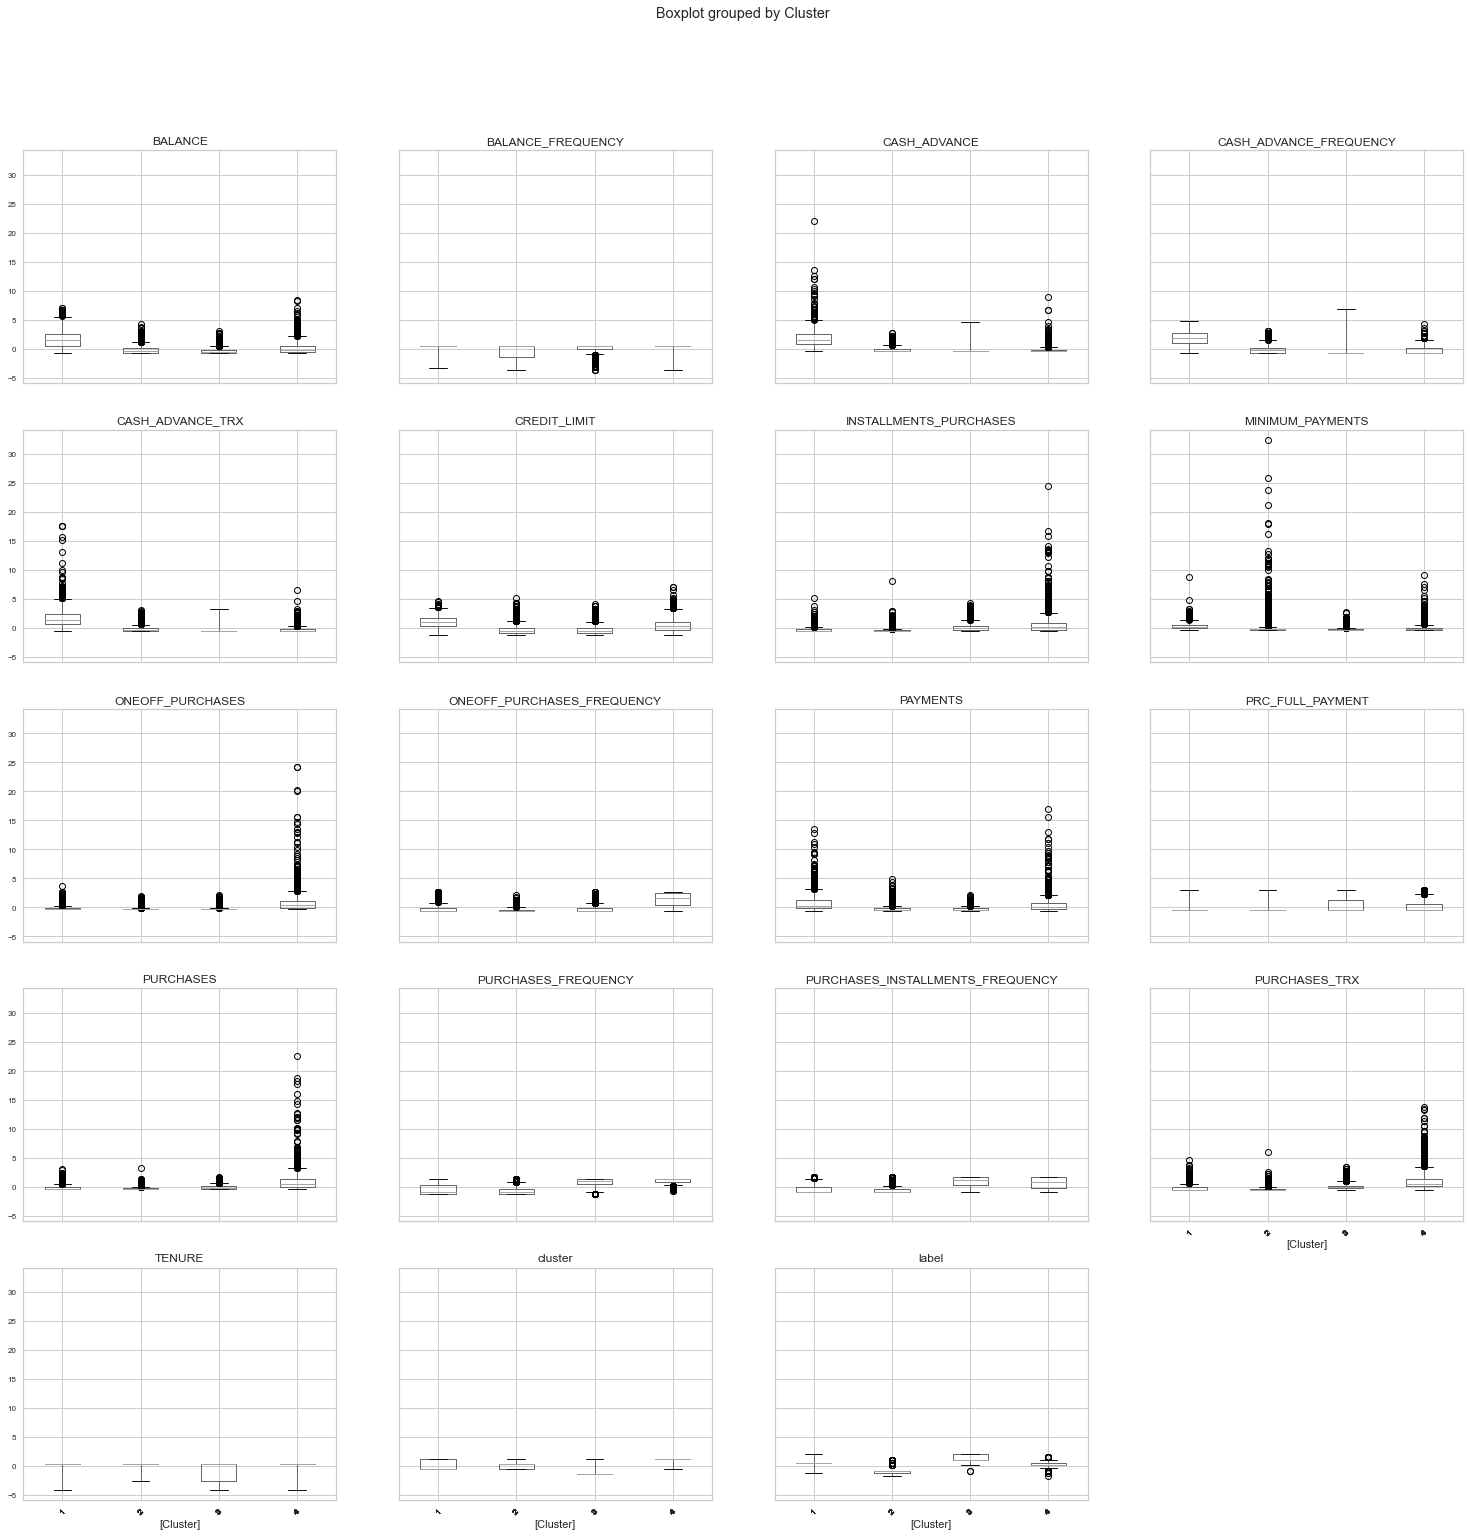

In [61]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1.0, 30.0)

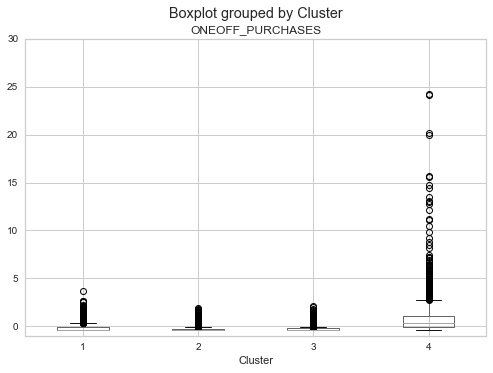

In [62]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

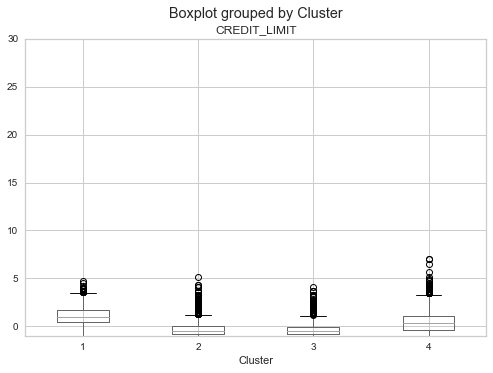

In [63]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 20.0)

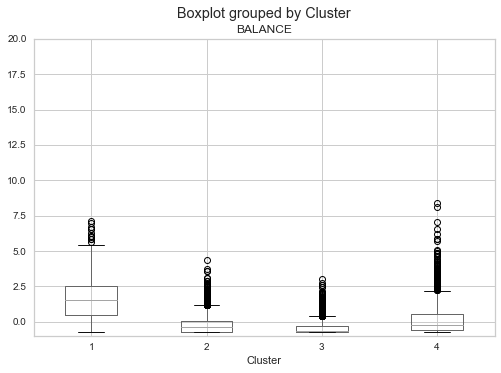

In [64]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

In [65]:
enlaces = linkage(datacopia, method = "complete") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36039062e-03, 2.00000000e+00],
       ...,
       [1.78830000e+04, 1.78950000e+04, 3.80860886e+01, 8.92100000e+03],
       [1.78930000e+04, 1.78960000e+04, 4.51637676e+01, 8.92700000e+03],
       [1.78940000e+04, 1.78970000e+04, 4.74328310e+01, 8.95000000e+03]])

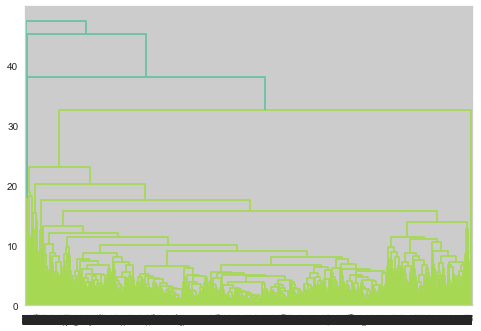

In [66]:
dendrogram(enlaces);

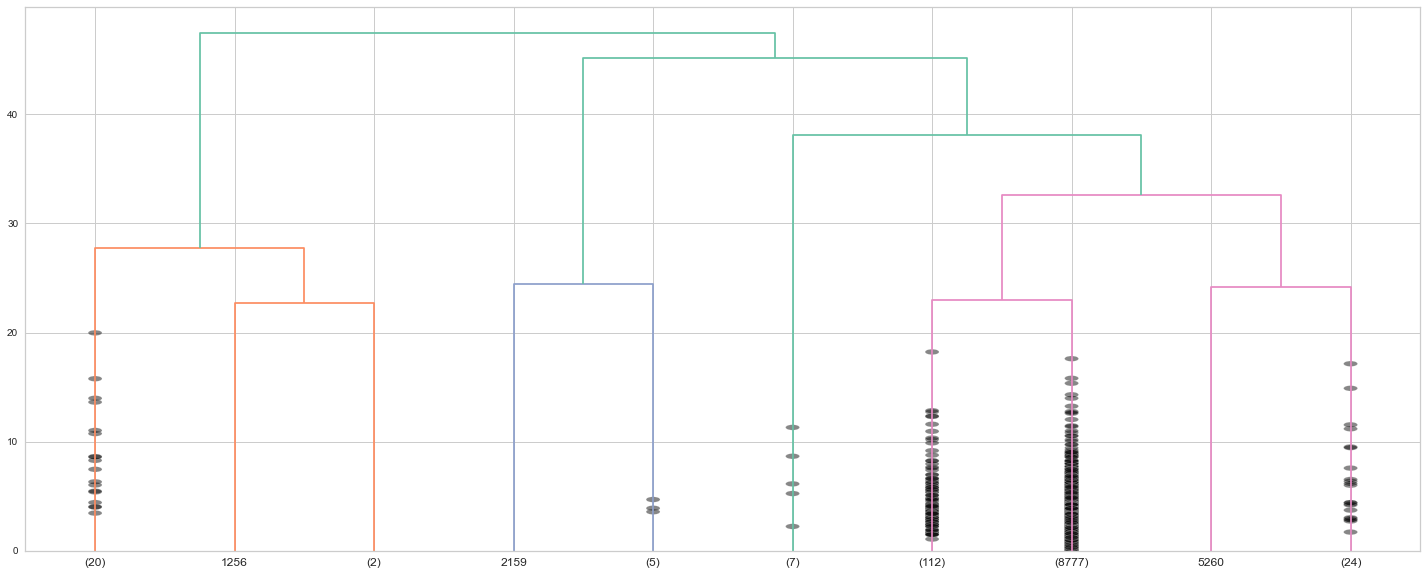

In [67]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [68]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [69]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[10.03158457,  5.31022131, 17.        ,  2.13931525],
       [17.38322491,  7.49228229,  2.        ,  0.70710678],
       [12.77104252,  4.05356294, 28.        ,  2.52261685],
       [12.20998609,  5.84791928, 11.        ,  2.04668256],
       [ 8.77026109,  8.89250148,  5.        ,  1.76575574],
       [13.86900884,  6.42771645, 15.        ,  2.16364856],
       [16.17682612,  5.38286162, 22.        ,  3.04265587],
       [17.76741676,  8.29204151, 18.        ,  2.45038231],
       [18.0698575 , 12.39726078, 17.        ,  2.18547553],
       [20.26857142, 12.17512822, 22.        ,  2.23112719]])

[47.43283099 45.16376764 38.0860886  32.55502164 27.7763283  24.4722466
 24.17882047 22.99662867 22.68106852 21.391822  ]
[-4.8086157   1.54661208  0.75237362  1.47461165  3.01065556 -0.88876567
  0.86663165 -0.97368637]


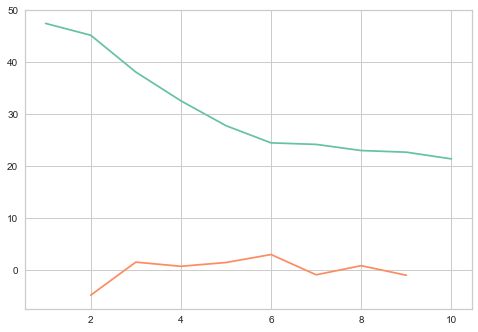

In [70]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [71]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [72]:
for n_clusters in range(2,21):

    score = silhouette_score(df_final_data_1, clusteres)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6978789961006607
For n_clusters = 3, silhouette score is 0.6978789961006607
For n_clusters = 4, silhouette score is 0.6978789961006607
For n_clusters = 5, silhouette score is 0.6978789961006607
For n_clusters = 6, silhouette score is 0.6978789961006607
For n_clusters = 7, silhouette score is 0.6978789961006607
For n_clusters = 8, silhouette score is 0.6978789961006607
For n_clusters = 9, silhouette score is 0.6978789961006607
For n_clusters = 10, silhouette score is 0.6978789961006607
For n_clusters = 11, silhouette score is 0.6978789961006607
For n_clusters = 12, silhouette score is 0.6978789961006607
For n_clusters = 13, silhouette score is 0.6978789961006607
For n_clusters = 14, silhouette score is 0.6978789961006607
For n_clusters = 15, silhouette score is 0.6978789961006607
For n_clusters = 16, silhouette score is 0.6978789961006607
For n_clusters = 17, silhouette score is 0.6978789961006607
For n_clusters = 18, silhouette score is 0.69787

(-5.0, 30.0)

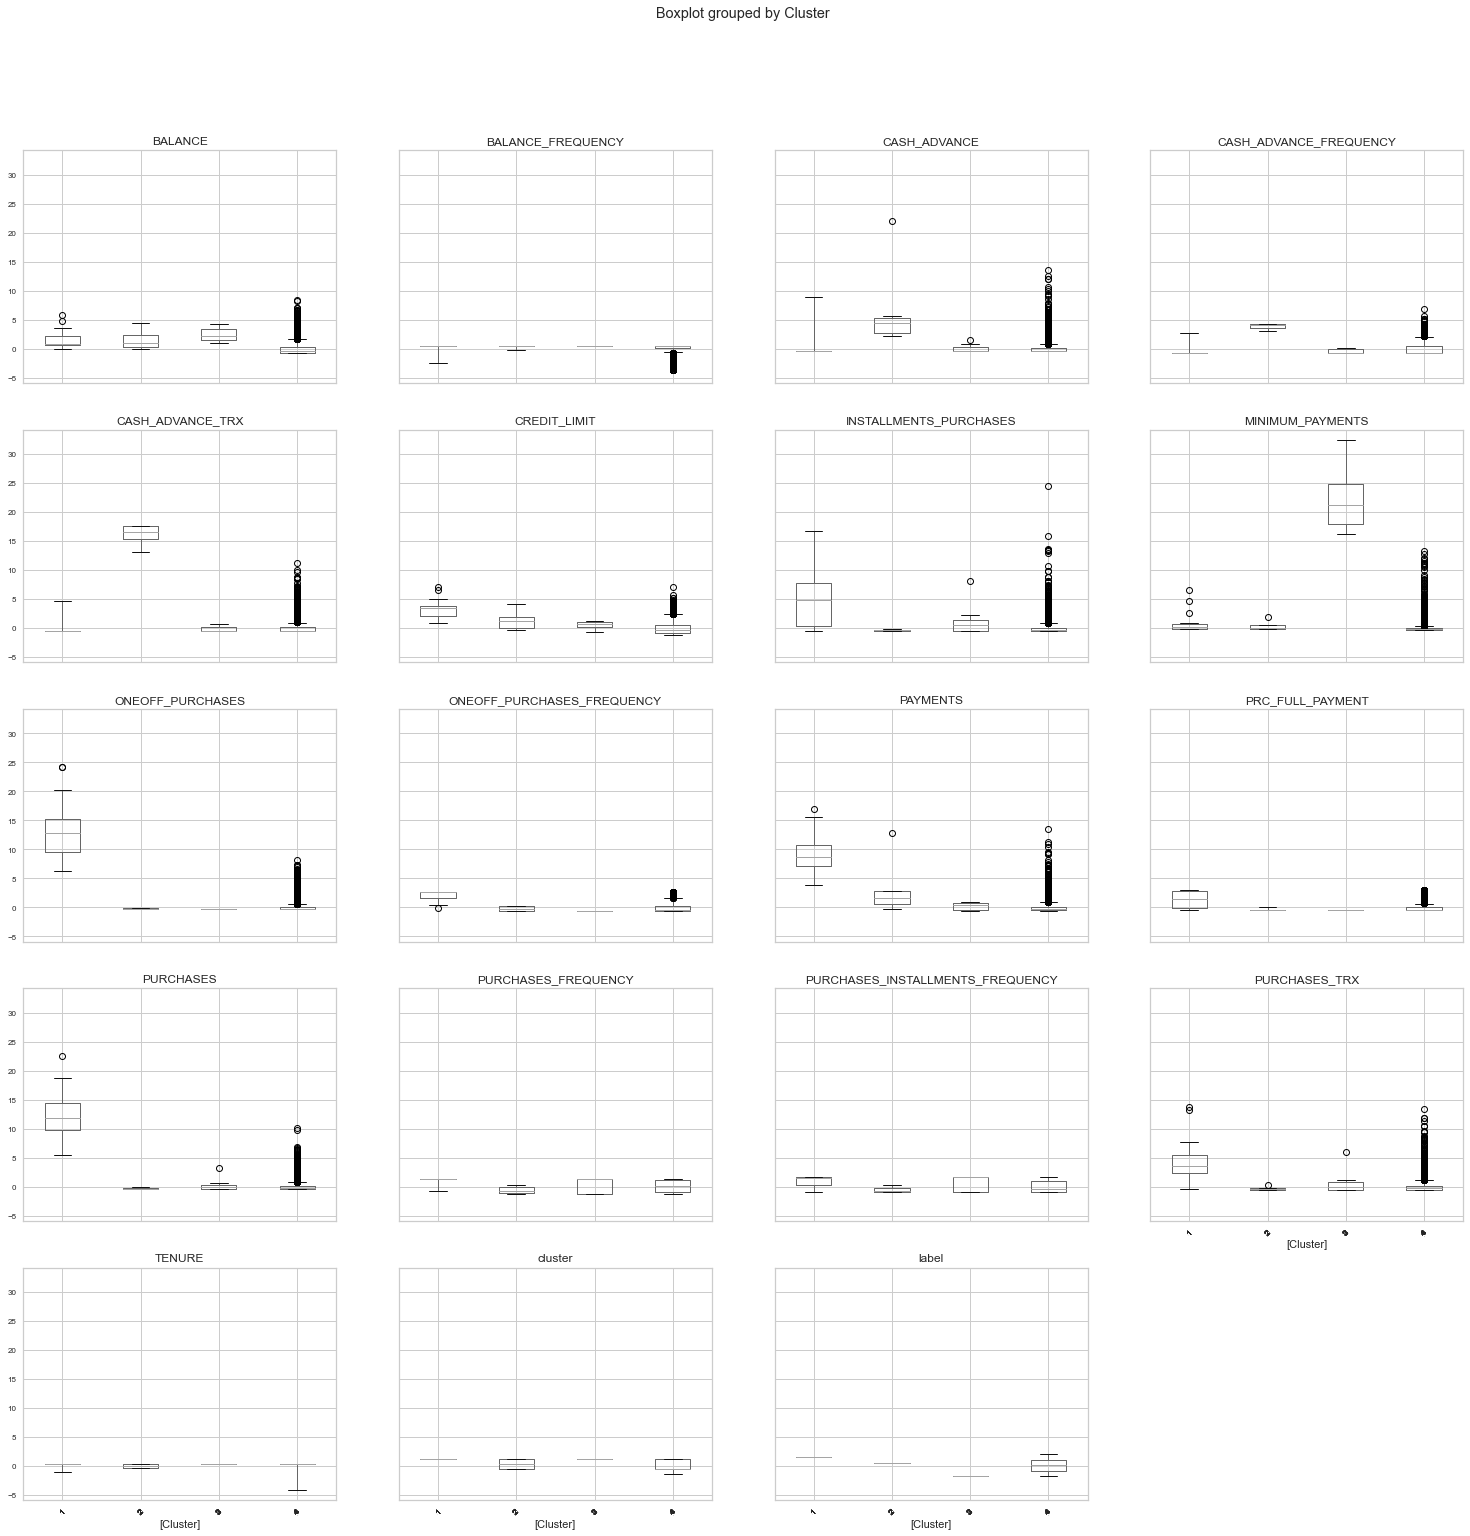

In [73]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1.0, 30.0)

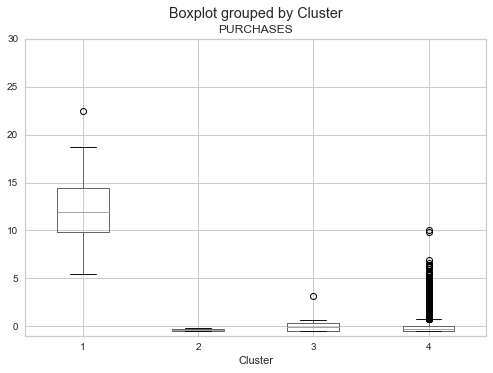

In [74]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

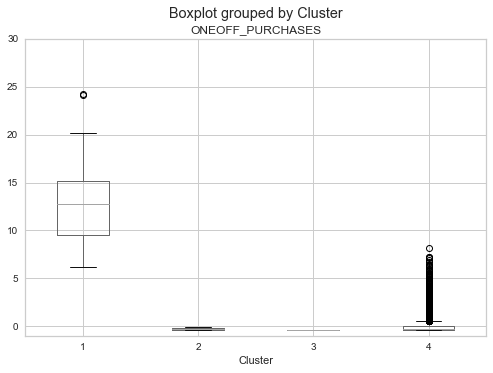

In [75]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

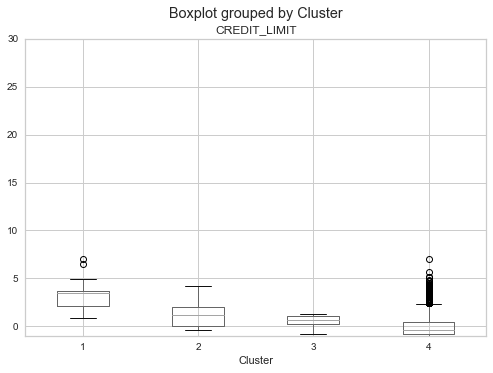

In [76]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 20.0)

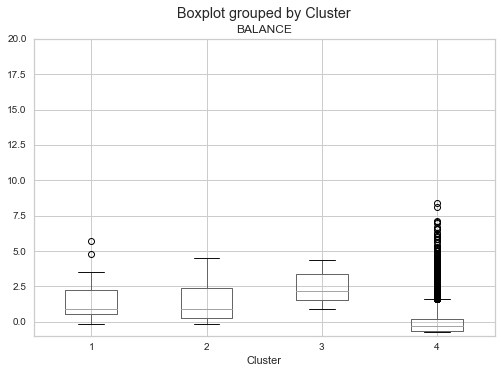

In [77]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

In [78]:
enlaces = linkage(datacopia, method = "average") # ward, complete, average
enlaces

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36039062e-03, 2.00000000e+00],
       ...,
       [1.78900000e+04, 1.78910000e+04, 2.33373180e+01, 8.92200000e+03],
       [1.78950000e+04, 1.78960000e+04, 2.40605121e+01, 8.94900000e+03],
       [2.15900000e+03, 1.78970000e+04, 3.22842598e+01, 8.95000000e+03]])

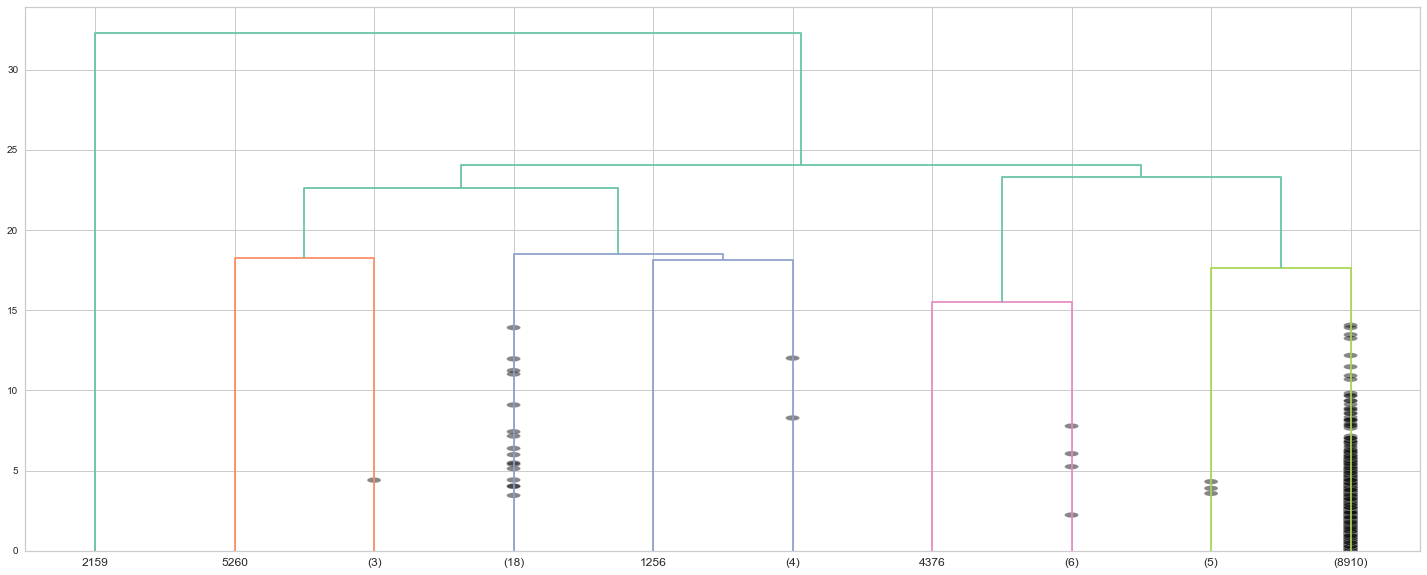

In [79]:
## let see minimized dendrogram 
plt.figure(figsize=(25,10))
dend = dendrogram(enlaces, truncate_mode="lastp", p = 10, show_leaf_counts= True, show_contracted= True)

In [80]:
## automatic cut of the dendrogram 

from scipy.cluster.hierarchy import inconsistent

In [81]:
## inconsistent method 

depth = 5
incons = inconsistent(enlaces, depth)
incons[-10:]

array([[ 9.69710362,  3.49739578, 21.        ,  1.59488303],
       [ 7.53066712,  4.46239312,  6.        ,  1.78246849],
       [10.20529642,  4.20238123, 18.        ,  1.77417208],
       [12.8803109 ,  4.05835912,  4.        ,  1.29163585],
       [10.90651886,  6.9587736 ,  3.        ,  1.05477263],
       [12.39424454,  3.66487908, 12.        ,  1.67192188],
       [13.87197902,  4.6909368 , 13.        ,  1.87071324],
       [10.21776499,  5.73759216, 19.        ,  2.28659561],
       [13.21883942,  6.21352684, 23.        ,  1.74485007],
       [17.47221965,  6.92018784, 14.        ,  2.14041013]])

[32.28425984 24.06051215 23.33731804 22.64737661 18.52163606 18.24644279
 18.12223304 17.66104386 15.48474224 15.27504081]
[ 7.50055358  0.03325267 -3.43579911  3.85054727  0.15098352 -0.33697943
 -1.71511244  1.96660019]


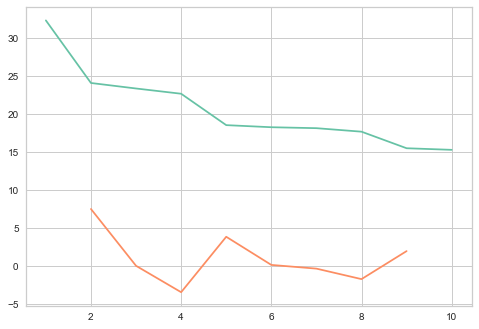

In [82]:
## método del codo 
last = enlaces[-10:,2]
last_rev = last[::-1]
print(last_rev)

idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1, acc_rev)

In [83]:
## visualization of cluster 

from scipy.cluster.hierarchy import fcluster

## Put the tags in the elements 
clusteres = fcluster(enlaces, 4, criterion="maxclust")
datacredit['Cluster'] = clusteres
datacopia['Cluster'] = clusteres
datacredit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [84]:
for n_clusters in range(2,21):

    score = silhouette_score(df_final_data_1, clusteres)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7399741851146796
For n_clusters = 3, silhouette score is 0.7399741851146796
For n_clusters = 4, silhouette score is 0.7399741851146796
For n_clusters = 5, silhouette score is 0.7399741851146796
For n_clusters = 6, silhouette score is 0.7399741851146796
For n_clusters = 7, silhouette score is 0.7399741851146796
For n_clusters = 8, silhouette score is 0.7399741851146796
For n_clusters = 9, silhouette score is 0.7399741851146796
For n_clusters = 10, silhouette score is 0.7399741851146796
For n_clusters = 11, silhouette score is 0.7399741851146796
For n_clusters = 12, silhouette score is 0.7399741851146796
For n_clusters = 13, silhouette score is 0.7399741851146796
For n_clusters = 14, silhouette score is 0.7399741851146796
For n_clusters = 15, silhouette score is 0.7399741851146796
For n_clusters = 16, silhouette score is 0.7399741851146796
For n_clusters = 17, silhouette score is 0.7399741851146796
For n_clusters = 18, silhouette score is 0.73997

(-5.0, 30.0)

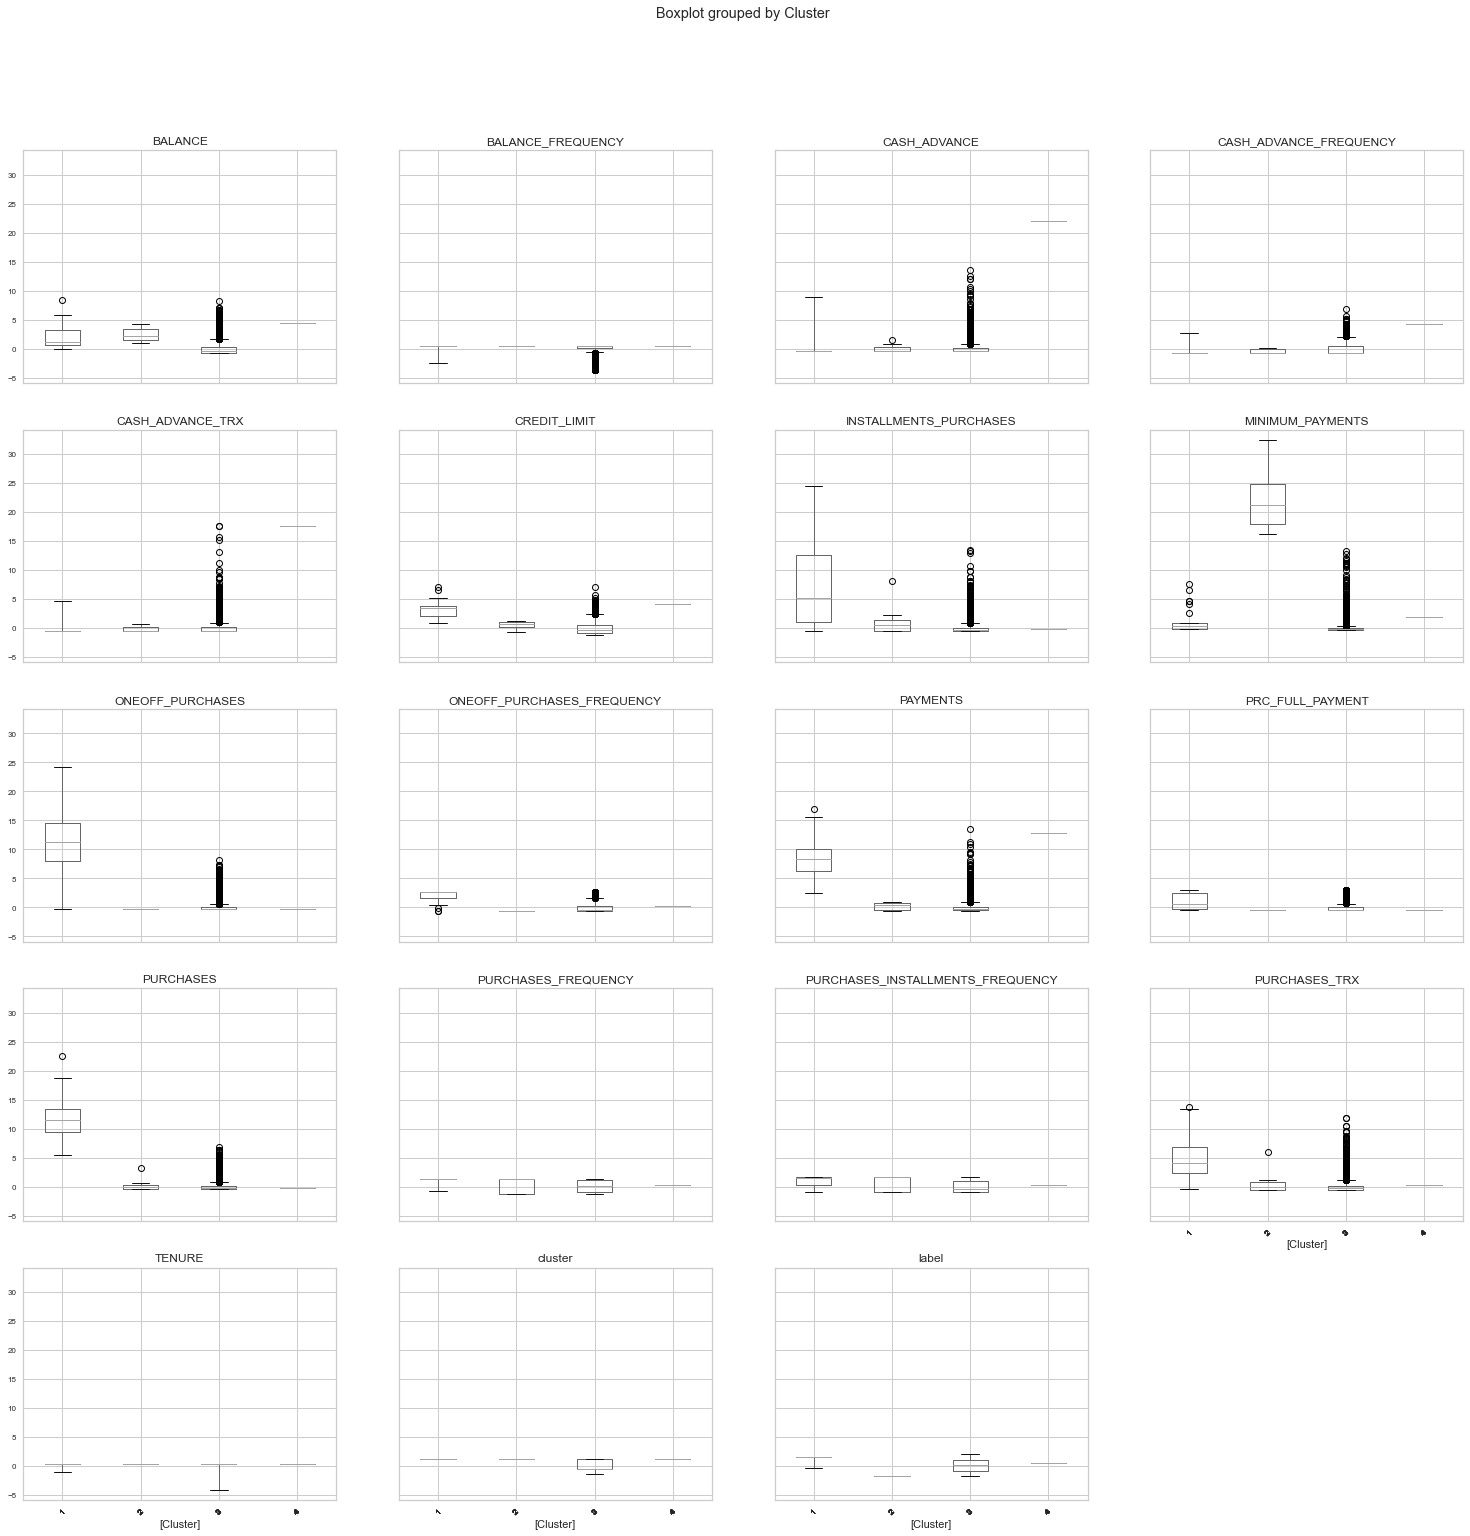

In [85]:
datacopia.boxplot(figsize = (25,25), fontsize = 8, by='Cluster', rot =45, autorange = True );
plt.ylim(-5, 30)

(-1.0, 30.0)

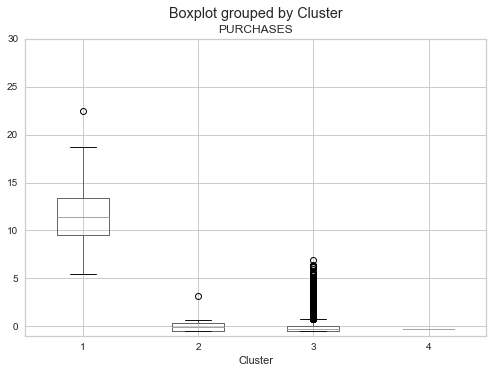

In [86]:
datacopia.boxplot(column='PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

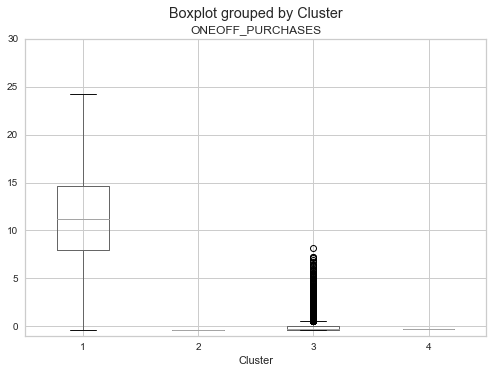

In [87]:
datacopia.boxplot(column='ONEOFF_PURCHASES', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 30.0)

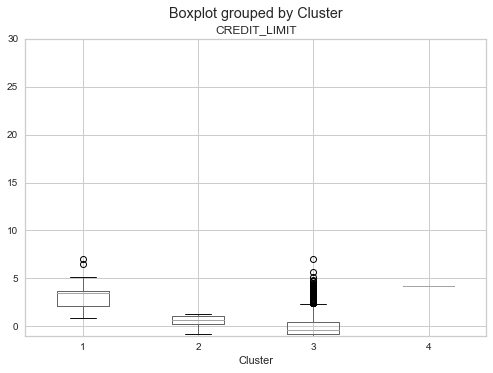

In [88]:
datacopia.boxplot(column='CREDIT_LIMIT', by='Cluster' )
plt.ylim(-1,30)

(-1.0, 20.0)

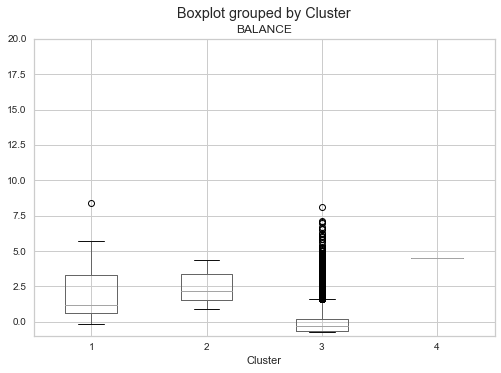

In [89]:
datacopia.boxplot(column='BALANCE', by='Cluster' )
plt.ylim(-1,20)

# DENSITY BASED CLUSTERS

In [90]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber =3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='cosine' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))



[0 0 0 ... 0 0 0]
1
{0}


In [91]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber = 3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='euclidean' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))

for n_clusters in range(2,21):
    #km = KMeans (n_clusters=n_clusters)
    #preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(subsetForClust1, labels)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

[0 0 0 ... 0 0 0]
8
{0, 1, 2, 3, 4, 5, 6, -1}
For n_clusters = 2, silhouette score is 0.3627325339228802
For n_clusters = 3, silhouette score is 0.3627325339228802
For n_clusters = 4, silhouette score is 0.3627325339228802
For n_clusters = 5, silhouette score is 0.3627325339228802
For n_clusters = 6, silhouette score is 0.3627325339228802
For n_clusters = 7, silhouette score is 0.3627325339228802
For n_clusters = 8, silhouette score is 0.3627325339228802
For n_clusters = 9, silhouette score is 0.3627325339228802
For n_clusters = 10, silhouette score is 0.3627325339228802
For n_clusters = 11, silhouette score is 0.3627325339228802
For n_clusters = 12, silhouette score is 0.3627325339228802
For n_clusters = 13, silhouette score is 0.3627325339228802
For n_clusters = 14, silhouette score is 0.3627325339228802
For n_clusters = 15, silhouette score is 0.3627325339228802
For n_clusters = 16, silhouette score is 0.3627325339228802
For n_clusters = 17, silhouette score is 0.3627325339228802
Fo

In [92]:
# print('DENSITY BASED CLUSTERS \n ')
expectedNumber = 3 #Found from trying in above section for various values of K_NN_Expected
EPSILON = 3
DISTANCEMETRIC='manhattan' #euclidean, cosine,manhattan
subsetForClust1=copiadata
db_default = DBSCAN(eps = EPSILON, min_samples = expectedNumber, metric=DISTANCEMETRIC).fit(subsetForClust1) 
labels = db_default.labels_ 
print(labels)
cluster_labels_ = labels
print(len(set(labels)))
print((set(labels)))
for n_clusters in range(2,21):
    #km = KMeans (n_clusters=n_clusters)
    #preds = km.fit_predict(df)
    centers = km.cluster_centers_

    score = silhouette_score(subsetForClust1, labels)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


[ 0 -1  0 ...  1  1 -1]
37
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
For n_clusters = 2, silhouette score is -0.14621993075199158
For n_clusters = 3, silhouette score is -0.14621993075199158
For n_clusters = 4, silhouette score is -0.14621993075199158
For n_clusters = 5, silhouette score is -0.14621993075199158
For n_clusters = 6, silhouette score is -0.14621993075199158
For n_clusters = 7, silhouette score is -0.14621993075199158
For n_clusters = 8, silhouette score is -0.14621993075199158
For n_clusters = 9, silhouette score is -0.14621993075199158
For n_clusters = 10, silhouette score is -0.14621993075199158
For n_clusters = 11, silhouette score is -0.14621993075199158
For n_clusters = 12, silhouette score is -0.14621993075199158
For n_clusters = 13, silhouette score is -0.14621993075199158
For n_clusters = 14, silhouette score is -0.14621993075199158
For n_clusters = 15, silhouette scor

CONCLUSSION

IDENTIFIED CLUSTERS

CLUSTER 1 - PEOPLE WITH LOW LEVEL OF INCOME. Not Frequent purchases.

CLUSTER 2 - PEOPLE WITH MEDIAN LEVEL O INCOME. High Frequent purchases.

CLUSTER 3 - PEOPLE WITH HIGH LEVEL OF INCOME. Not Frequent purchases and the most high advance level.

CLUSTER 4 - PEOPLE WITH LOW LEVEL OF INCOME. Frequent purchases.


Seems the best clustering obtained with these dataset is with Agglomerative clustering for  linkages Complete and  Average method.Silhouette score is 0.7464789204171737 with 
Agglomerative clustering with method Complete, Average.

In [93]:
endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 30 May 2021 11:35:58 +0000
Run ended at :  Sun, 30 May 2021 11:51:52 +0000
